# Exercise with Jacobi contour

Yuri Shimane

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys
sys.path.append('../')   # path to polaris module

import polaris.SolarSystemConstants as sscs
import polaris.Keplerian as kepl
import polaris.Propagator as prop
import polaris.R3BP as r3bp

In [3]:
def get_jacobi_contour(naifID1, naifID2, cmin=2, cmax=4, cstep=0.05, scale=1, grid=1000, cmap='viridis'):
    """Function creates a plot of Jacobi contour (zero-velocity curve contour)"""
    # non-dimensionalise masses
    mu = r3bp.get_cr3bp_mu(naifID1, naifID2)
    m1 = 1 - mu
    m2 = mu

    # Lagrange points
    lp = r3bp.lagrangePoints(mu)

    # create mesh-grid in x-y plane
    x = np.linspace(-1.5, 1.5, grid)
    y = np.linspace(-1.5, 1.5, grid)
    z = 0
    [X,Y] = np.meshgrid(x,y)

    # compute potential
    d1 = np.power((X + mu)**2 + Y**2 + z**2, 0.5)
    d2 = np.power((X - 1 + mu)**2 + Y**2 + z**2, 0.5)
    U = 0.5*(X**2 + Y**2)+(1 - mu)/d1 + mu/d2

    C = 2*U # 0-velocity Jacobi constant

    # define color scale
    levels = np.arange(cmin, cmax, cstep)   # requires fine-tuning (currently tuned for earth-moon)
    
    ## plot Jacobi contours with Lagrange points
    plt.rcParams["font.size"] = 20
    fig, ax = plt.subplots(1,1, figsize=(15, 10))
    im = ax.contour(X*scale, Y*scale, C, levels, cmap=cmap)
    fig.colorbar(im)
    ax.scatter(-mu*scale, 0.0, marker='+', s=200, c='b')
    ax.scatter((1-mu)*scale, 0.0, marker='+', s=200, c='k')
    ax.set(xlabel='x', ylabel='y', title='Zero-velocity contour')
    ax.scatter(lp.l1[0]*scale, lp.l1[1]*scale, marker='x', s=120, c='r')
    ax.scatter(lp.l2[0]*scale, lp.l2[1]*scale, marker='x', s=120, c='r')
    ax.scatter(lp.l3[0]*scale, lp.l3[1]*scale, marker='x', s=120, c='r')
    ax.scatter(lp.l4[0]*scale, lp.l4[1]*scale, marker='x', s=120, c='r')
    ax.scatter(lp.l5[0]*scale, lp.l5[1]*scale, marker='x', s=120, c='r')
    plt.grid(True)
    plt.axis("equal")
    plt.show()

In [4]:
param_earth_moon = r3bp.get_cr3bp_param('399','301')   # NAIF ID's '399': Earth, '301': Moon
param_earth_moon.mu

0.012150584269940354

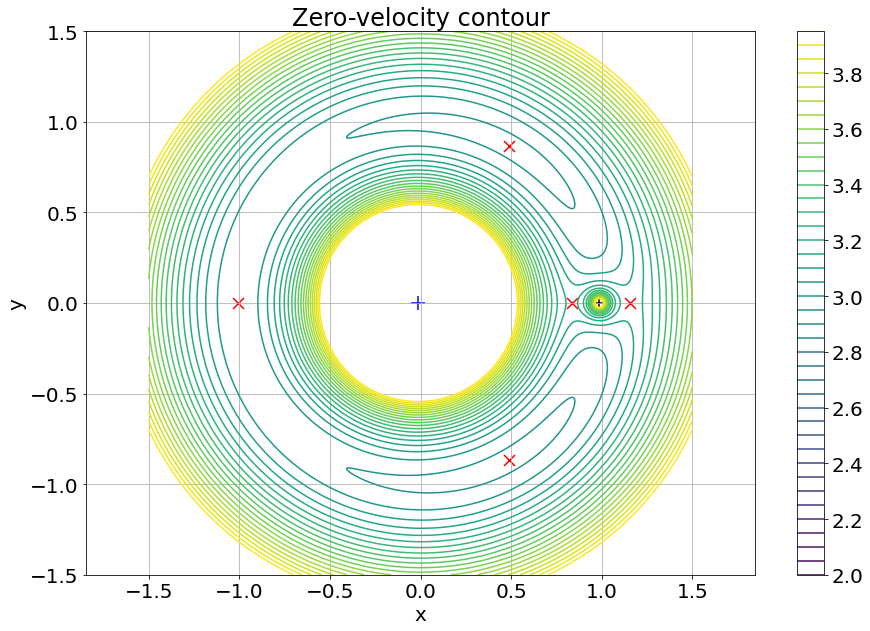

In [5]:
r3bp.get_jacobi_contour("399", "301", cmin=2, cmax=4, cstep=0.05, scale=1, grid=500)     #param_earth_moon.lstar)